# <b>Graduate Rotational Internship Program
<b>The Sparks Foundation

<b>Task6:-Exploratory Data Analysis - Sports

<b>Problem Statement:- Suggest teams or players a company should endorse for its products.

<b>DataSet can be downloaded from this link :- https://bit.ly/34SRn3b

<b>Author :- Rohit Kadam

In [1]:
# Importing Important Python Libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset

Matches=pd.read_csv('matches.csv')
Matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
Matches.shape

(756, 18)

In [4]:
Matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
Matches.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


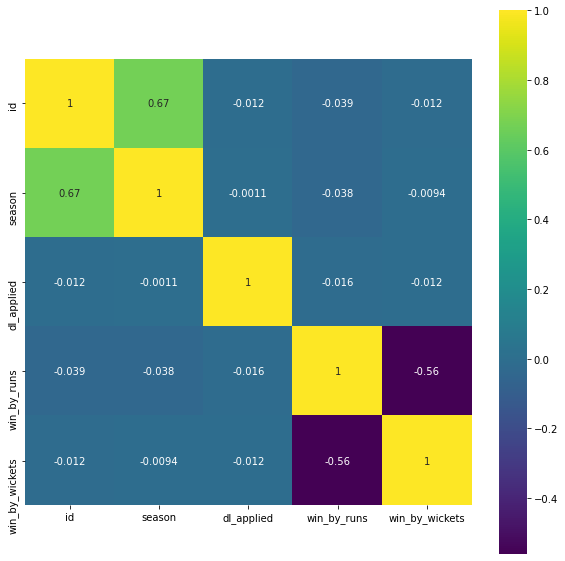

In [6]:
correlation = Matches.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis');

In [7]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
Matches.isna().sum().sort_values(ascending=False)

umpire3            637
city                 7
player_of_match      4
winner               4
umpire1              2
umpire2              2
toss_winner          0
season               0
date                 0
team1                0
team2                0
result               0
toss_decision        0
dl_applied           0
win_by_runs          0
win_by_wickets       0
venue                0
id                   0
dtype: int64

In [9]:
all_cols = set(Matches.columns)
all_cols

{'city',
 'date',
 'dl_applied',
 'id',
 'player_of_match',
 'result',
 'season',
 'team1',
 'team2',
 'toss_decision',
 'toss_winner',
 'umpire1',
 'umpire2',
 'umpire3',
 'venue',
 'win_by_runs',
 'win_by_wickets',
 'winner'}

In [10]:
num_cols = set(Matches.describe().columns)
num_cols

{'dl_applied', 'id', 'season', 'win_by_runs', 'win_by_wickets'}

In [11]:
cat_cols = all_cols - num_cols
cat_cols

{'city',
 'date',
 'player_of_match',
 'result',
 'team1',
 'team2',
 'toss_decision',
 'toss_winner',
 'umpire1',
 'umpire2',
 'umpire3',
 'venue',
 'winner'}

In [12]:
Matches.drop(['umpire3','umpire1','umpire2','date'],axis=1,inplace=True)

In [13]:
Matches.dropna(subset=['winner'],inplace=True)

In [14]:
Matches.dropna(subset=['city'],inplace=True)

In [15]:
Matches[Matches['winner'].isnull()]

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue


In [16]:
Matches.isna().sum().sort_values(ascending=False)


venue              0
player_of_match    0
win_by_wickets     0
win_by_runs        0
winner             0
dl_applied         0
result             0
toss_decision      0
toss_winner        0
team2              0
team1              0
city               0
season             0
id                 0
dtype: int64

In [17]:
Matches.shape

(745, 14)

In [18]:
Deliveries=pd.read_csv('deliveries.csv')
Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [20]:
Deliveries.drop(['player_dismissed','dismissal_kind','fielder'],axis=1,inplace=True)

In [21]:
Deliveries.isna().sum().sort_values(ascending=False)

total_runs       0
extra_runs       0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
match_id         0
dtype: int64

In [22]:
Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


# <b>Visualization by using Graphs,to find out the most successful teams, players and factors contributing win or loss of a team.

<AxesSubplot:title={'center':'Teams with Total No. of Matches won'}, ylabel='No. of Matches Won'>

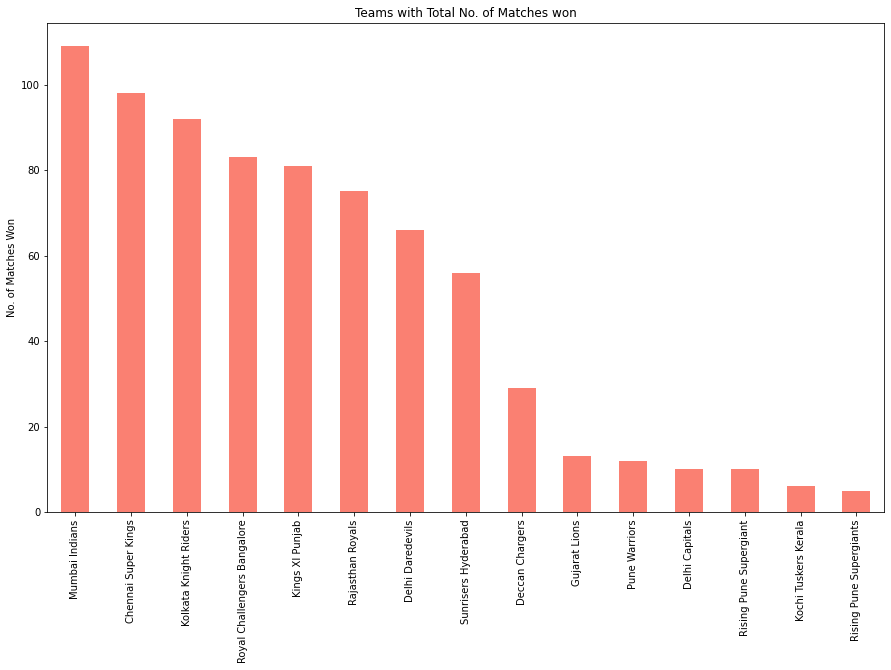

In [23]:
plt.figure(figsize=[15,9])
plt.title('Teams with Total No. of Matches won')
plt.ylabel('No. of Matches Won')
Matches.winner.value_counts().plot(kind='bar', color='salmon')

<Figure size 1296x720 with 0 Axes>

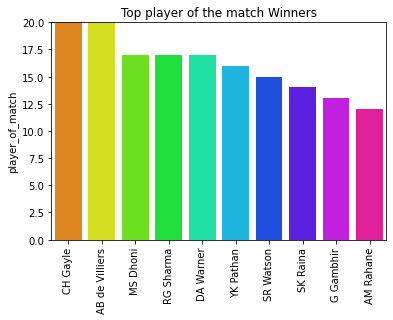

In [24]:
# we will print name of top player in IPL
plt.figure(figsize = (18,10))
top_players = Matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

In [25]:
season_data=Matches[['id','season','winner']]

complete_data=Deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [26]:
wins_per_season = Matches.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

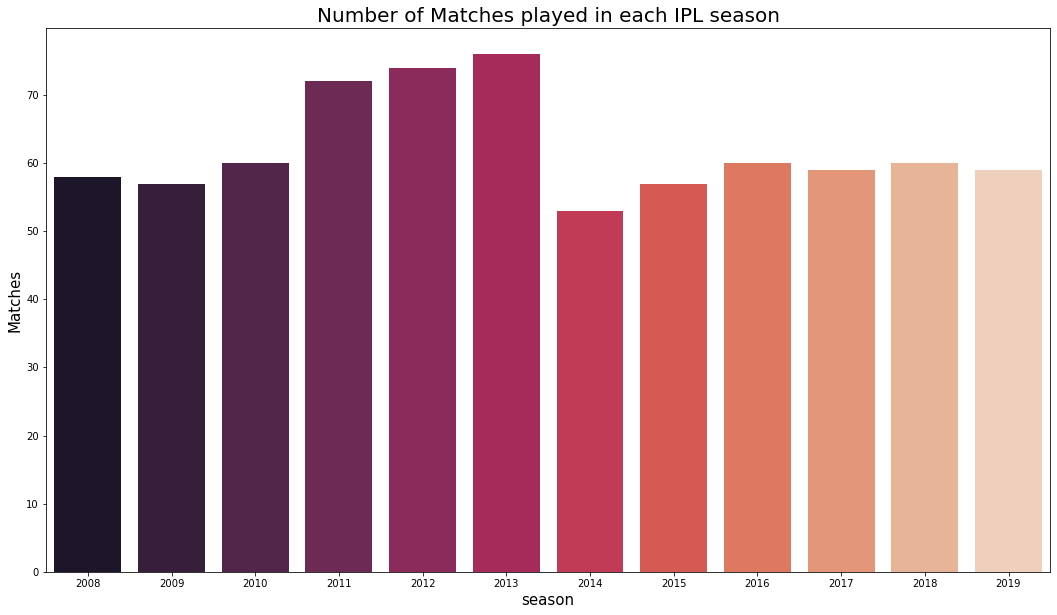

In [27]:
plt.figure(figsize = (18,10))
sns.countplot('season',data=Matches,palette="rocket")
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

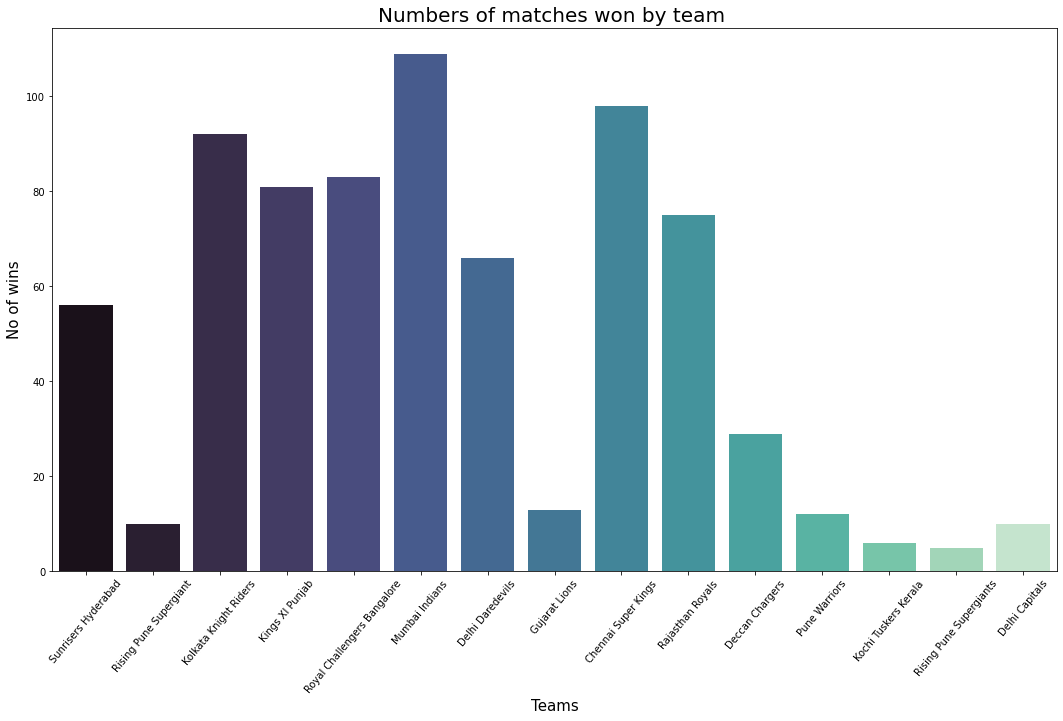

In [28]:

plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=Matches, palette='mako')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

In [29]:
# we will print winner season wise
final_matches=Matches.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [30]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


<BarContainer object of 2 artists>

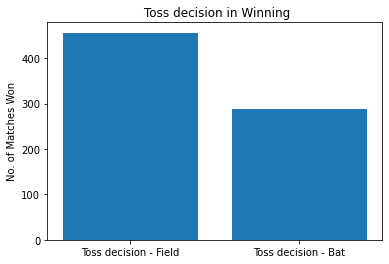

In [31]:

plt.title(' Toss decision in Winning')
plt.ylabel('No. of Matches Won')
result1 = ['Toss decision - Field', 'Toss decision - Bat']
count1 = [Matches[Matches.toss_decision == 'field'].winner.count(), Matches[Matches.toss_decision == 'bat'].winner.count()]
plt.bar(result1, count1)

In [32]:
Matches['win_by']=np.where(Matches['win_by_runs']>0,'Bat first','Bowl first')


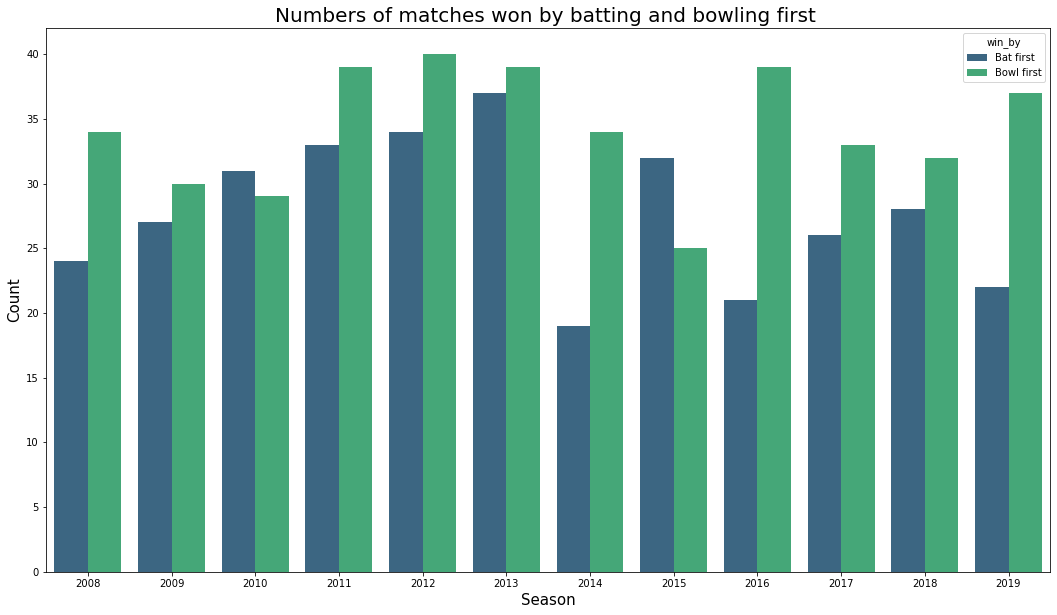

In [33]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=Matches,palette='viridis')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [34]:
# We will print IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['venue','winner']).size()

venue                                      winner               
Dr DY Patil Sports Academy                 Chennai Super Kings      1
                                           Rajasthan Royals         1
Eden Gardens                               Mumbai Indians           2
M Chinnaswamy Stadium                      Kolkata Knight Riders    1
                                           Sunrisers Hyderabad      1
MA Chidambaram Stadium, Chepauk            Chennai Super Kings      1
                                           Kolkata Knight Riders    1
New Wanderers Stadium                      Deccan Chargers          1
Rajiv Gandhi International Stadium, Uppal  Mumbai Indians           1
Rajiv Gandhi Intl. Cricket Stadium         Mumbai Indians           1
Wankhede Stadium                           Chennai Super Kings      1
dtype: int64

In [35]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

<AxesSubplot:title={'center':'Teams with Total No. of Matches won'}, ylabel='No. of Matches Won'>

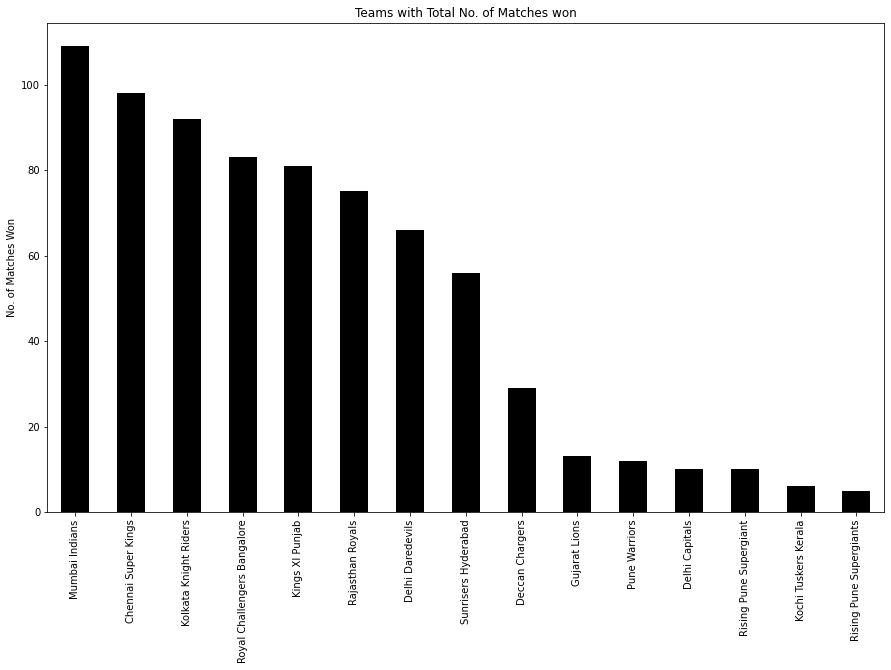

In [36]:

plt.figure(figsize=[15,9])
plt.title('Teams with Total No. of Matches won')
plt.ylabel('No. of Matches Won')
Matches.winner.value_counts().plot(kind='bar', color='black')

In [37]:

# we will print man of the match
final_matches[['winner','player_of_match','win_by_runs','win_by_wickets']].reset_index(drop=True)

,winner,player_of_match,win_by_runs,win_by_wickets
0,Mumbai Indians,KH Pandya,1,0
1,Rajasthan Royals,YK Pathan,0,3
2,Deccan Chargers,A Kumble,6,0
3,Chennai Super Kings,SK Raina,22,0
4,Chennai Super Kings,M Vijay,58,0
5,Kolkata Knight Riders,MS Bisla,0,5
6,Mumbai Indians,KA Pollard,23,0
7,Kolkata Knight Riders,MK Pandey,0,3
8,Mumbai Indians,RG Sharma,41,0
9,Sunrisers Hyderabad,BCJ Cutting,8,0


In [38]:
# we will print numbers of fours and six hit by team
four_data=complete_data[complete_data['batsman_runs']==4]
six_data=complete_data[complete_data['batsman_runs']==6]

four=four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])
six=six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

data_combine = pd.concat( [four,six] )
data_combine=data_combine.fillna('0')
data_combine

,runs by fours,fours,runs by six,sixes
batting_team,,,,
Chennai Super Kings,8696,2174,0,0
Deccan Chargers,3828,957,0,0
Delhi Capitals,968,242,0,0
Delhi Daredevils,8440,2110,0,0
Gujarat Lions,1840,460,0,0
Kings XI Punjab,9780,2445,0,0
Kochi Tuskers Kerala,680,170,0,0
Kolkata Knight Riders,9672,2418,0,0
Mumbai Indians,10216,2554,0,0


In [39]:

# We will print the top 5 leading run scorer in IPL
batsman_score=Deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 5 Leading Run Scorer in IPL ***")
batsman_score.iloc[:5,:]

*** Top 5 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632


# <b>Conclusion

The highest number of match won by Mumbai Indians.

It is interesting that out of 12 IPL finals,4 times the Mumbai Indians team that won the toss was also the winner of IPL.

Teams which Bowl first has higher chances of winning then the team which bat first.

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.

The IPL most wicket taken blower is SL Malinga.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

The highest number of four hit by player is Shikar Dhawan.

Top player of match winning are CH gayle, AB de villers.

